In [1]:
# Here we will train a CNN to classify images from the CIFAR-10 dataset.
# 1. Load CIFAR-10 Database

In [2]:
import keras
from keras.datasets import cifar10

In [3]:
# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [4]:
### 2. Visualize the First 24 Training Images

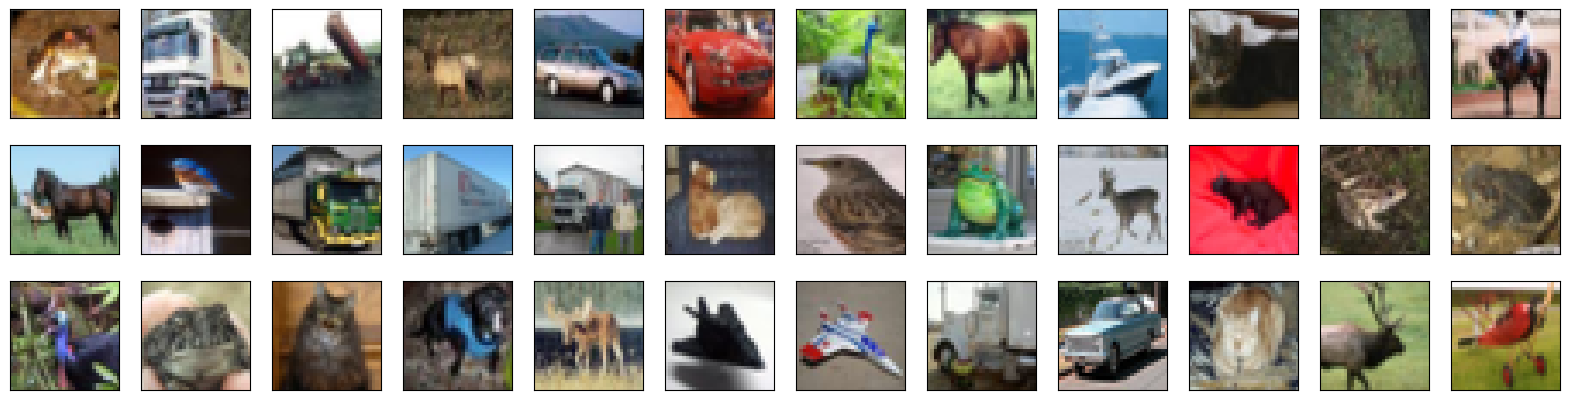

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):                                              ##import total 36 images in which there are 12 images in each rows
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [ ]:
# 3. Rescale the Images by Dividing Every Pixel in Every Image by 255
"""In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very
different scales. Figure below shows Gradient Descent on a training set where features 1 and 2 have the
same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on
the right).

** Tip: ** When using Gradient Descent, you should ensure that all features have a similar scale to speed up training or else it will take much longer to converge

In [7]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [8]:
### 4.  Break Dataset into Training, Testing, and Validation Sets

In [9]:
from keras.utils import np_utils
from tensorflow import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]               ##In this datasets there are 60000 images in which 45000 are for training and 10000 are for testing and 5000 for validation
(y_train, y_valid) = y_train[5000:], y_train[:5000]                               ##Total no. of channels is 3 because it is the RGB image
# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [10]:
### 5. Define the Model Architecture

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu',                   ##32*32*16
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))                                                             ##16*16*16
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))                  ##16*16*32
model.add(MaxPooling2D(pool_size=2))                                                             ##8*8*32
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))                  ##8*8*64
model.add(MaxPooling2D(pool_size=2))                                                             ##4*4*64
model.add(Dropout(0.3))                                                                          ##Deactivate 30% of total output data
model.add(Flatten())                                                                             ##Flatten it i.e convert it into 1D before passing through the dense layer
model.add(Dense(500, activation='relu'))                                                         ## Total 500 neurons would be there in the 1st Hidden layer
model.add(Dropout(0.4))                                                                          ## Deactivate 40% of the output data obtained after this previous neurons i.e set it to zero
model.add(Dense(10, activation='softmax'))                                                       ## Take 10 neurons in the output layer

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [12]:
### 6. Compile the Model

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])   ##sInce it is the classification problem use the accuracy as the metrics loss as the categorical_crossentropy


In [14]:
### 7. Train the Model

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1,
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=10,                            ##Take batchsize as 32 and number of epochs as 10
          validation_data=(x_test, y_test), callbacks=[checkpointer],
          verbose=2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.35236, saving model to model.weights.best.hdf5
1407/1407 - 75s - loss: 1.5865 - accuracy: 0.4260 - val_loss: 1.3524 - val_accuracy: 0.5168 - 75s/epoch - 53ms/step
Epoch 2/10

Epoch 2: val_loss improved from 1.35236 to 1.17027, saving model to model.weights.best.hdf5
1407/1407 - 71s - loss: 1.2198 - accuracy: 0.5678 - val_loss: 1.1703 - val_accuracy: 0.5952 - 71s/epoch - 50ms/step
Epoch 3/10

Epoch 3: val_loss improved from 1.17027 to 1.15681, saving model to model.weights.best.hdf5
1407/1407 - 72s - loss: 1.0785 - accuracy: 0.6217 - val_loss: 1.1568 - val_accuracy: 0.5917 - 72s/epoch - 51ms/step
Epoch 4/10

Epoch 4: val_loss improved from 1.15681 to 0.92592, saving model to model.weights.best.hdf5
1407/1407 - 75s - loss: 1.0015 - accuracy: 0.6511 - val_loss: 0.9259 - val_accuracy: 0.6768 - 75s/epoch - 53ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 0.92592
1407/1407 - 70s - loss: 0.9586 - accuracy: 0.6687 - val_loss: 0.9

In [18]:
### 8. Load the Model with the Best Validation Accuracy

In [19]:
model.load_weights('model.weights.best.hdf5')

In [20]:
### 10. Visualize Some Predictions

In [21]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 [==============================] - 5s 16ms/step


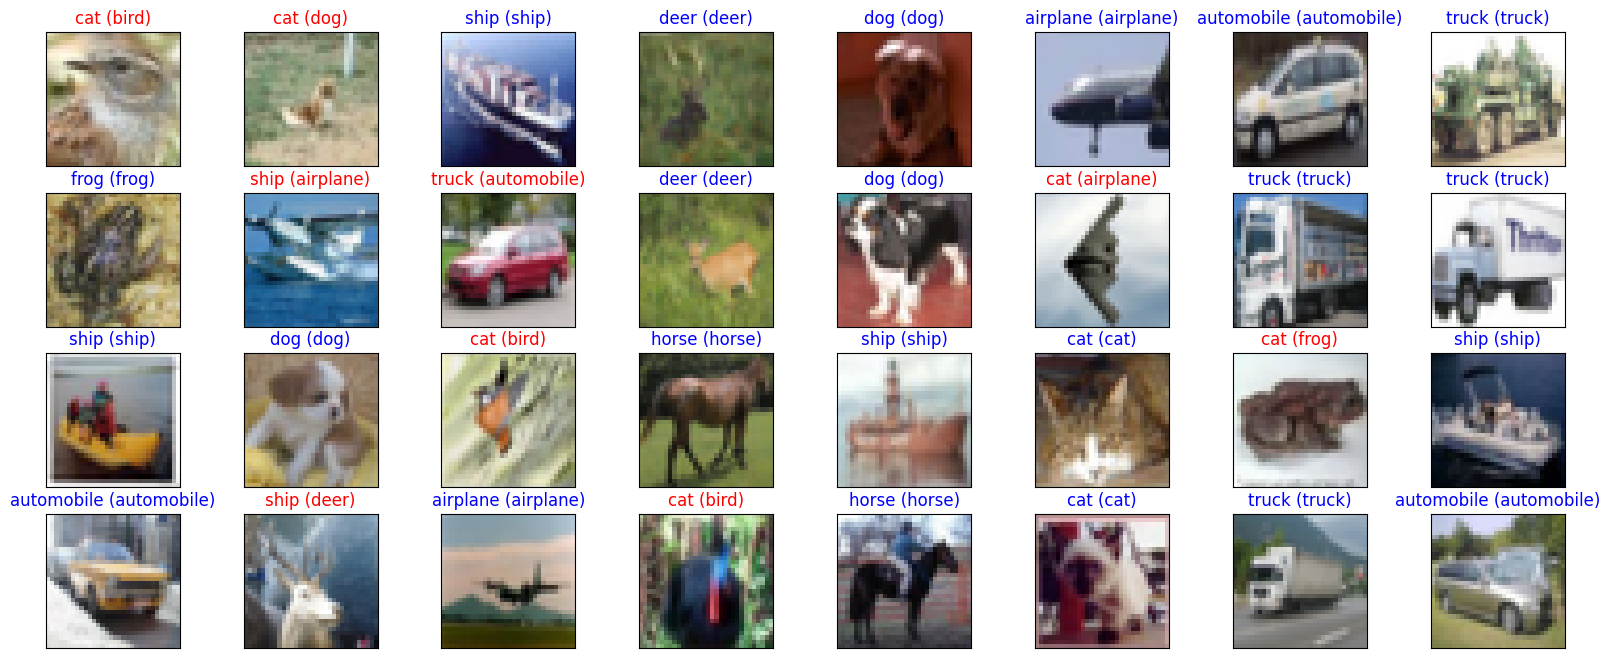

In [22]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))